In [1]:
import os
import chardet
import numpy as np
import pandas as pd
import joblib

In [2]:
%precision 3
pd.options.display.precision = 3

In [3]:
import pingouin as pg
import scikit_posthocs as sp

In [4]:
os.getcwd()

'C:\\Users\\hdsce\\Documents\\HarimExpert\\live'

In [5]:
os.chdir('../data')

In [6]:
os.listdir()

['Used_Cars_Price.csv', 'Used_Cars_Price.xlsx', 'Used_Cars_Prics.z']

In [7]:
[file for file in os.listdir() if '.z' in file]

['Used_Cars_Prics.z']

In [8]:
df = joblib.load('Used_Cars_Prics.z')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1268 non-null   int64 
 1   Age        1268 non-null   int64 
 2   KM         1268 non-null   int64 
 3   FuelType   1268 non-null   object
 4   HP         1268 non-null   int64 
 5   MetColor   1268 non-null   object
 6   Automatic  1268 non-null   object
 7   CC         1268 non-null   int64 
 8   Doors      1268 non-null   int64 
 9   Weight     1268 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 99.2+ KB


In [10]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [11]:
df['Age'].cov(df['Price'])

-22157.693

In [13]:
df.cov(numeric_only = True)

,Price,Age,KM,HP,CC,Doors,Weight
Price,4.117e+06,-22157.693,-3.744e+07,5899.686,1.881e+04,317.011,15155.222
Age,-2.216e+04,187.942,1.712e+05,-7.990,-2.136e+02,-1.181,-98.226
KM,-3.744e+07,171187.124,1.286e+09,-155996.120,2.558e+06,595.873,359258.458
HP,5.900e+03,-7.990,-1.560e+05,171.608,-4.669e+01,1.497,-39.091
CC,1.881e+04,-213.607,2.558e+06,-46.686,3.373e+04,23.854,5001.293
Doors,3.170e+02,-1.181,5.959e+02,1.497,2.385e+01,0.900,13.211
Weight,1.516e+04,-98.226,3.593e+05,-39.091,5.001e+03,13.211,1145.079


In [14]:
df['Age'].corr(df['Price'])

-0.797

In [15]:
df.corr(numeric_only = True)

,Price,Age,KM,HP,CC,Doors,Weight
Price,1.000,-0.797,-0.515,0.222,0.050,0.165,0.221
Age,-0.797,1.000,0.348,-0.044,-0.085,-0.091,-0.212
KM,-0.515,0.348,1.000,-0.332,0.388,0.018,0.296
HP,0.222,-0.044,-0.332,1.000,-0.019,0.120,-0.088
CC,0.050,-0.085,0.388,-0.019,1.000,0.137,0.805
Doors,0.165,-0.091,0.018,0.120,0.137,1.000,0.412
Weight,0.221,-0.212,0.296,-0.088,0.805,0.412,1.000


In [16]:
pg.corr(x = df['Age'], y = df['Price'])

,n,r,CI95%,p-val,BF10,power
pearson,1268,-0.797,"[-0.82, -0.78]",5.880e-279,6.169e+274,1.0


In [17]:
x = df['Age']

In [19]:
pg.corr(x = x, y = df['Price'])['p-val']

pearson    5.880e-279
Name: p-val, dtype: float64

In [20]:
corr = lambda x: pg.corr(x = x, y = df['Price'])['p-val']

In [21]:
corr(x = df['Age'])

pearson    5.880e-279
Name: p-val, dtype: float64

In [22]:
df.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor     object
Automatic    object
CC            int64
Doors         int64
Weight        int64
dtype: object

In [25]:
locs = df.dtypes.astype(str).isin(values = ['int64', 'float64'])
locs

Price         True
Age           True
KM            True
FuelType     False
HP            True
MetColor     False
Automatic    False
CC            True
Doors         True
Weight        True
dtype: bool

In [29]:
df.loc[:, locs]

,Price,Age,KM,HP,CC,Doors,Weight
0,13500,23,46986,90,2000,3,1165
1,13750,23,72937,90,2000,3,1165
2,13950,24,41711,90,2000,3,1165
3,14950,26,48000,90,2000,3,1165
4,13750,30,38500,90,2000,3,1170
...,...,...,...,...,...,...,...
1263,15950,25,25000,97,1400,3,1100
1264,15500,25,49163,110,1600,5,1165
1265,15950,25,29719,97,1400,5,1110
1266,15950,19,51884,97,1400,3,1100


In [30]:
df.loc[:, locs].apply(func = corr)

,Price,Age,KM,HP,CC,Doors,Weight
pearson,0.0,5.880e-279,1.187e-86,1.289e-15,0.072,3.645e-09,1.863e-15


In [32]:
df.loc[:, locs].apply(func = corr).lt(0.05)

,Price,Age,KM,HP,CC,Doors,Weight
pearson,True,True,True,True,False,True,True


In [33]:
coef = lambda x: pg.corr(x = x, y = df['Price'])['r']
df.loc[:, locs].apply(func = coef)

,Price,Age,KM,HP,CC,Doors,Weight
pearson,1.0,-0.797,-0.515,0.222,0.05,0.165,0.221


In [34]:
pg.normality(data = df, dv = 'Price', group = 'MetColor')

,W,pval,normal
1,0.975,7.077e-11,False
0,0.988,1.430e-03,False


In [35]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'MetColor')

,W,pval,equal_var
levene,5.761,0.017,False


In [49]:
values = df['MetColor'].unique()
values

array(['1', '0'], dtype=object)

In [50]:
sp1, sp2 = [df['Price'][df['MetColor'].eq(value)] for value in values]

In [42]:
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.892,1266,two-sided,0.004,"[111.73, 583.18]",0.172,4.077,0.824


In [43]:
pg.ttest(x = sp1, y = sp2, correction = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.984,935.893,two-sided,0.003,"[118.92, 576.0]",0.172,5.313,0.824


In [51]:
pg.mwu(x = sp1, y = sp2)

,U-val,alternative,p-val,RBC,CLES
MWU,193144.0,two-sided,0.03,-0.074,0.537


In [55]:
from GraphicSetting import *

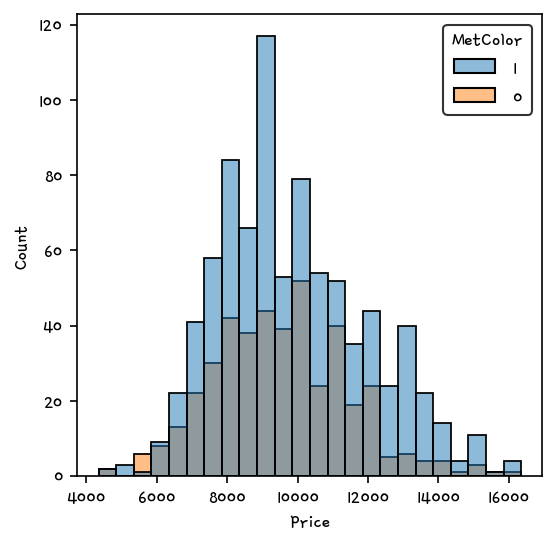

In [58]:
sns.histplot(data = df, x = 'Price', hue = 'MetColor', binwidth = 500);

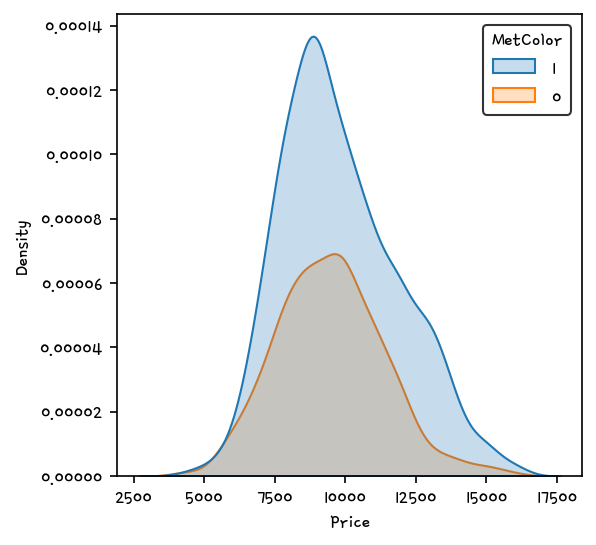

In [56]:
sns.kdeplot(data = df, x = 'Price', hue = 'MetColor', fill = True);

In [44]:
pg.normality(data = df, dv = 'Price', group = 'Automatic')

,W,pval,normal
0,0.981,2.977e-11,False
1,0.948,5.998e-03,False


In [45]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'Automatic')

,W,pval,equal_var
levene,1.093,0.296,True


In [52]:
values = df['Automatic'].unique()
values

array(['0', '1'], dtype=object)

In [53]:
sp1, sp2 = [df['Price'][df['Automatic'].eq(value)] for value in values]

In [48]:
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.473,1266,two-sided,0.141,"[-856.55, 121.99]",0.181,0.377,0.313


In [54]:
pg.mwu(x = sp1, y = sp2)

,U-val,alternative,p-val,RBC,CLES
MWU,37216.5,two-sided,0.113,0.112,0.444


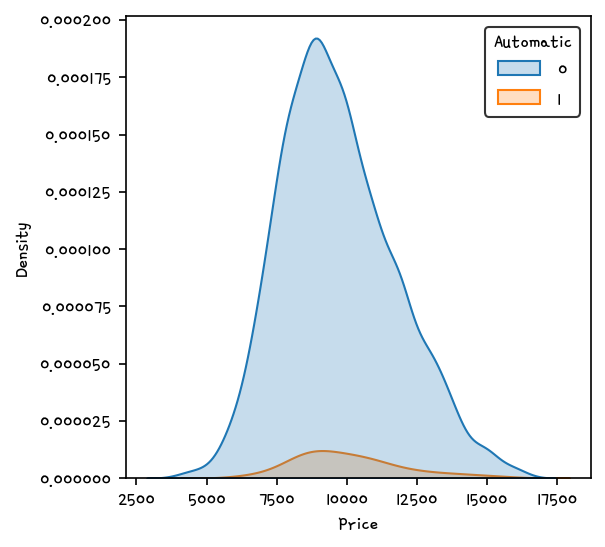

In [59]:
sns.kdeplot(data = df, x = 'Price', hue = 'Automatic', fill = True);

In [60]:
pg.normality(data = df, dv = 'Price', group = 'FuelType')

,W,pval,normal
Diesel,0.956,4.250e-04,False
Petrol,0.978,5.504e-12,False
CNG,0.952,4.957e-01,True


In [61]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'FuelType')

,W,pval,equal_var
levene,6.498,0.002,False


In [62]:
pg.anova(data = df, dv = 'Price', between = 'FuelType')

C:\Users\hdsce\Venv\lib\site-packages\pingouin\parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,Source,ddof1,ddof2,F,p-unc,np2
0,FuelType,2,1265,3.983,0.019,0.006


In [63]:
pg.welch_anova(data = df, dv = 'Price', between = 'FuelType')

C:\Users\hdsce\Venv\lib\site-packages\pingouin\parametric.py:1341: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_res = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,Source,ddof1,ddof2,F,p-unc,np2
0,FuelType,2,38.942,2.612,0.086,0.006


In [64]:
pg.kruskal(data = df, dv = 'Price', between = 'FuelType')

,Source,ddof1,H,p-unc
Kruskal,FuelType,2,10.475,0.005


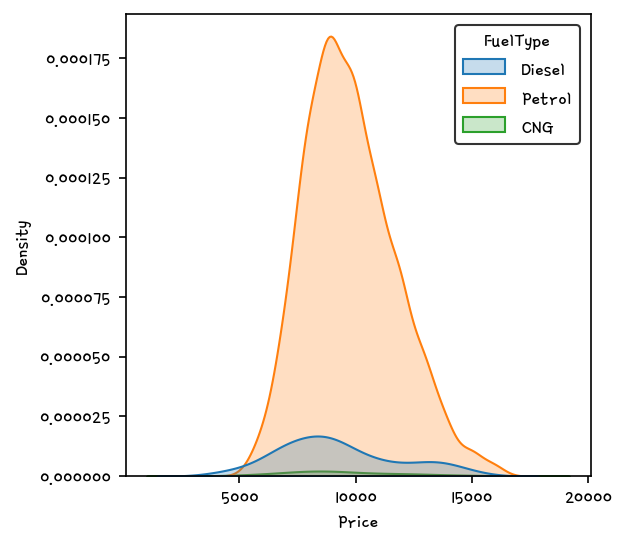

In [65]:
sns.kdeplot(data = df, x = 'Price', hue = 'FuelType', fill = True);

In [66]:
sp.posthoc_scheffe(a = df, val_col = 'Price', group_col = 'FuelType')

,Diesel,Petrol,CNG
Diesel,1.000,0.022,0.934
Petrol,0.022,1.000,0.798
CNG,0.934,0.798,1.000


In [67]:
sp.posthoc_tukey(a = df, val_col = 'Price', group_col = 'FuelType')

,Diesel,Petrol,CNG
Diesel,1.000,0.016,0.900
Petrol,0.016,1.000,0.759
CNG,0.900,0.759,1.000


In [68]:
sp.posthoc_nemenyi(a = df, val_col = 'Price', group_col = 'FuelType')

,CNG,Diesel,Petrol
CNG,1.000,0.954,0.676
Diesel,0.954,1.000,0.007
Petrol,0.676,0.007,1.000


In [69]:
import HelloDataScience as hds

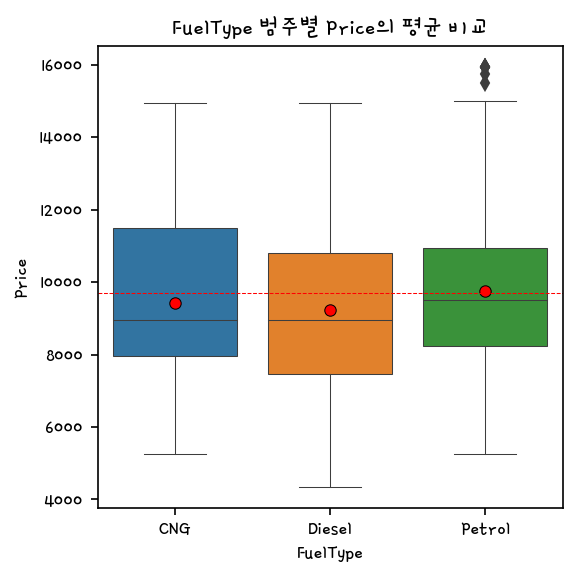

In [70]:
hds.plot_box_group(data = df, x = 'FuelType', y = 'Price')

In [73]:
pd.crosstab(
    index = df['MetColor'], 
    columns = df['Automatic'], 
    margins = True, 
    margins_name = '합계'
)

Automatic,0,1,합계
MetColor,,,
0,402,26,428
1,796,44,840
합계,1198,70,1268


In [74]:
pd.crosstab(
    index = df['MetColor'], 
    columns = df['Automatic'], 
    normalize = 'index', 
    margins = True, 
    margins_name = '합계'
)

Automatic,0,1
MetColor,,
0,0.939,0.061
1,0.948,0.052
합계,0.945,0.055


In [76]:
pg.chi2_independence(data = df, x = 'MetColor', y = 'Automatic', correction = False)

(Automatic        0       1
 MetColor                  
 0          404.372  23.628
 1          793.628  46.372,
 Automatic    0   1
 MetColor          
 0          402  26
 1          796  44,
                  test  lambda   chi2  dof   pval  cramer  power
 0             pearson   1.000  0.381  1.0  0.537   0.017  0.095
 1        cressie-read   0.667  0.379  1.0  0.538   0.017  0.094
 2      log-likelihood   0.000  0.375  1.0  0.540   0.017  0.094
 3       freeman-tukey  -0.500  0.373  1.0  0.542   0.017  0.094
 4  mod-log-likelihood  -1.000  0.370  1.0  0.543   0.017  0.093
 5              neyman  -2.000  0.365  1.0  0.546   0.017  0.093)

In [77]:
df = df.drop(columns = ['CC', 'Automatic'])

In [78]:
df = df[df['FuelType'].ne('CNG')]

In [79]:
df = df.reset_index(drop = True)

In [80]:
joblib.dump(value = df, filename = 'Used_Cars_Price_Prep.z')

['Used_Cars_Price_Prep.z']